Dựa trên mô tả trước đó, file .h5 của bạn có ba nhóm dữ liệu chính:

PPG:
Kích thước: (905400, 875)
Mỗi hàng là một đoạn tín hiệu PPG (Photoplethysmogram) kéo dài 7 giây (875 điểm mẫu).
Loại dữ liệu: thường là float32 hoặc float64.

875 điểm mẫu / 7 giây nghĩa là:
Trong mỗi đoạn tín hiệu PPG kéo dài 7 giây, bạn thu được tổng cộng 875 giá trị (điểm mẫu).

Để biết tốc độ lấy mẫu (sampling rate), ta chia:
875 điểm mẫu / 7 giây = 125 điểm mẫu mỗi giây
Hay nói cách khác, tín hiệu PPG này được lấy mẫu ở tần số 125 Hz
(Hz = số lần lấy mẫu/giây).
Đây là tần số lấy mẫu phổ biến cho tín hiệu sinh lý như PPG, ECG, vì đủ để bắt được các dao động nhanh của nhịp tim mà không tạo ra quá nhiều dữ liệu.

label:
Kích thước: (905400, 2)
Mỗi hàng là cặp [SBP, DBP] ứng với đoạn PPG tương ứng (cùng chỉ số).
Loại dữ liệu: float32, float64 hoặc int.

subject_idx:
Kích thước: (905400, 1) hoặc (905400,)
Mỗi giá trị là ID của chủ thể (người tham gia), giúp phân biệt từng người, dùng cho việc chia tập train/val/test không bị trùng lặp chủ thể.
Loại dữ liệu: int.


In [1]:
import os.path

import h5py

from setting import BASE_DIR

dataset_path = os.path.join(BASE_DIR, "MIMIC-III_ppg_dataset.h5")
with h5py.File(dataset_path, 'r') as f:
    print("Các group/dataset trong file:", list(f.keys()))
    # Đọc dữ liệu
    ppg = f['ppg'][:]            # shape (905400, 875)
    label = f['label'][:]        # shape (905400, 2)
    subject_idx = f['subject_idx'][:]  # shape (905400, 1)

print('PPG:', ppg.shape)
print('Label:', label.shape)
print('Subject_idx:', subject_idx.shape)

Các group/dataset trong file: ['label', 'ppg', 'subject_idx']
PPG: (9054000, 875)
Label: (9054000, 2)
Subject_idx: (9054000, 1)


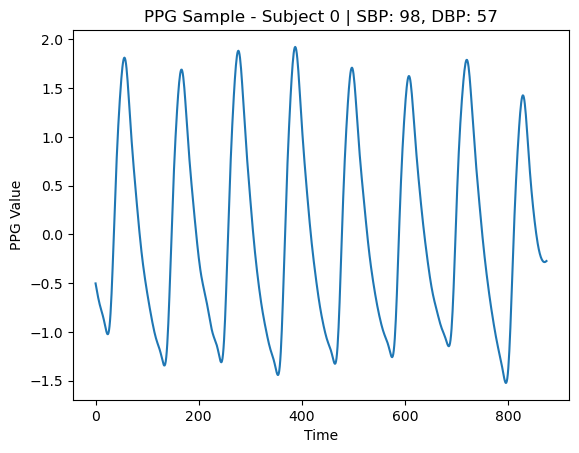

In [2]:
import matplotlib.pyplot as plt

# Lấy mẫu đầu tiên
sample_idx = 0
sample_ppg = ppg[sample_idx]
sample_bp = label[sample_idx]
subject = subject_idx[sample_idx][0]

plt.plot(sample_ppg)
plt.title(f'PPG Sample - Subject {subject} | SBP: {sample_bp[0]}, DBP: {sample_bp[1]}')
plt.xlabel('Time')
plt.ylabel('PPG Value')
plt.show()

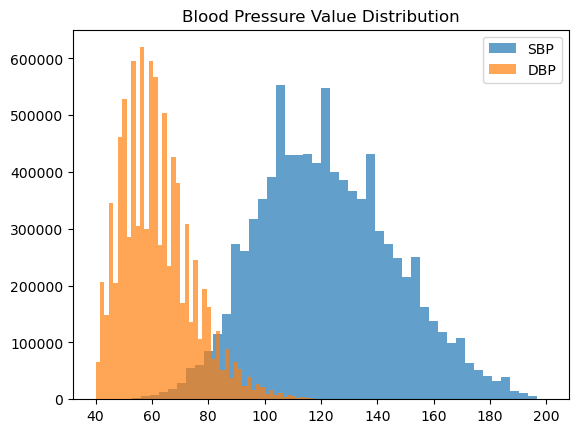

In [4]:
plt.hist(label[:,0], bins=50, alpha=0.7, label='SBP')
plt.hist(label[:,1], bins=50, alpha=0.7, label='DBP')
plt.legend()
plt.title("Blood Pressure Value Distribution")
plt.show()

SBP (Systolic Blood Pressure):
Là huyết áp tâm thu – giá trị huyết áp cao nhất khi tim co bóp để bơm máu vào động mạch.
Đơn vị: mmHg
Ví dụ: 120 mmHg (trong chỉ số 120/80).

DBP (Diastolic Blood Pressure):
Là huyết áp tâm trương – giá trị huyết áp thấp nhất khi tim thư giãn giữa hai lần co bóp.
Đơn vị: mmHg
Ví dụ: 80 mmHg (trong chỉ số 120/80).